In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns

custom_params = {"xtick.minor.visible": True,
                 "xtick.major.pad":5,
                 "xtick.direction":"in",
                 "xtick.top":True,
                 "ytick.minor.visible": True,
                 "ytick.direction":"in",
                 "ytick.right":True,
                 "font.family":"Helvetica",
                 "font.size":12.0,
                 "legend.frameon":False,
                 "legend.labelspacing":0}

sns.set_theme(style='ticks', rc=custom_params)

In [2]:
def Import_Angles(directory):
    # Get list of file names in the directory
    file_names = os.listdir(directory)
    imports = []
    # Import each file
    for file_name in file_names:
        # Remove file extension
        module_name = os.path.splitext(file_name)[0]
        imports.append(module_name)
        # Import file
        globals()[module_name] = pd.read_csv(os.path.join(directory, file_name), delim_whitespace=True, header=None, names=['HOH', 'Count'])
    return imports

def Import_BondLengths(directory):
    # Get list of file names in the directory
    file_names = os.listdir(directory)
    imports = []
    # Import each file
    for file_name in file_names:
        # Remove file extension
        module_name = os.path.splitext(file_name)[0]
        imports.append(module_name)
        # Import file
        globals()[module_name] = pd.read_csv(os.path.join(directory, file_name), delim_whitespace=True, header=None, names=['rOH', 'Count'])
        globals()[module_name] = globals()[module_name].sort_values('rOH', ascending=True)
    return imports

In [3]:
# Import qTIP4P/F distributions for comparison
imported_angles_qTIP4P = []
locs = ['CMD', 'CMD_QT']
for loc in locs:
    imported_angles_qTIP4P.append(Import_Angles('Data\Angles\qTIP4P\{}'.format(loc)))
for sublist in imported_angles_qTIP4P:
    print(sublist)

imported_lengths_qTIP4P = []
locs = ['CMD', 'CMD_QT']
for loc in locs:
    imported_lengths_qTIP4P.append(Import_BondLengths('Data\Bond_Lengths\qTIP4P\{}'.format(loc)))
for sublist in imported_lengths_qTIP4P:
    print(sublist)

['CMD_ang_1000', 'CMD_ang_300', 'CMD_ang_500']
['CMD_QT_ang_1000', 'CMD_QT_ang_300', 'CMD_QT_ang_500']
['CMD_dist_1000', 'CMD_dist_300', 'CMD_dist_500']
['CMD_QT_dist_1000', 'CMD_QT_dist_300', 'CMD_QT_dist_500']


In [4]:
# Import Schwenke distributions
imported_angles_Schwenke = []
locs = ['CMD', 'PIGLE4']
for loc in locs:
    imported_angles_Schwenke.append(Import_Angles('Data\Angles\Schwenke\{}'.format(loc)))
for sublist in imported_angles_Schwenke:
    print(sublist)

imported_lengths_Schwenke = []
locs = ['CMD', 'PIGLE4']
for loc in locs:
    imported_lengths_Schwenke.append(Import_BondLengths('Data\Bond_Lengths\Schwenke\{}'.format(loc)))
for sublist in imported_lengths_Schwenke:
    print(sublist)

['CMD_ang_1000_Schwenke', 'CMD_ang_300_Schwenke', 'CMD_ang_500_Schwenke', 'CMD_GLE_ang_300_Schwenke']
['PIGLE4_ang_1000_Schwenke', 'PIGLE4_ang_1000_Schwenke_new', 'PIGLE4_ang_300_Schwenke', 'PIGLE4_ang_300_Schwenke_new', 'PIGLE4_ang_500_Schwenke']
['CMD_dist_1000_Schwenke', 'CMD_dist_300_Schwenke', 'CMD_dist_500_Schwenke', 'CMD_GLE_dist_300_Schwenke']
['PIGLE4_dist_1000_Schwenke', 'PIGLE4_dist_1000_Schwenke_new', 'PIGLE4_dist_300_Schwenke', 'PIGLE4_dist_300_Schwenke_new', 'PIGLE4_dist_500_Schwenke']


### CMD (Nosé Hoover Thermostat)

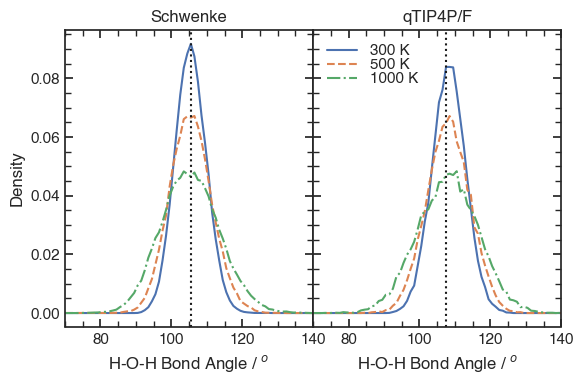

In [5]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(6,4))

# Plot for Schwenke CMD angle distribution
axs[0].plot(CMD_ang_300_Schwenke['HOH'], CMD_ang_300_Schwenke['Count'], label='300 K')
axs[0].plot(CMD_ang_500_Schwenke['HOH'], CMD_ang_500_Schwenke['Count'], label='500 K', linestyle='--')
axs[0].plot(CMD_ang_1000_Schwenke['HOH'], CMD_ang_1000_Schwenke['Count'], label='1000 K', linestyle='-.')
axs[0].set_ylabel('Density')
axs[0].set_xlim(70,140)
axs[0].set_xlabel(r'H-O-H Bond Angle / $^o$')
axs[0].set_title('Schwenke')

# Draw vertical line on the peak of the 300 line
peak_index_schwenke = CMD_ang_300_Schwenke['Count'].idxmax()
peak_x_schwenke = CMD_ang_300_Schwenke['HOH'][peak_index_schwenke]
axs[0].axvline(x=peak_x_schwenke, color='k', linestyle=':')

# Plot for qTIP4P CMD angle distribution
axs[1].plot(CMD_ang_300['HOH'], CMD_ang_300['Count'], label='300 K')
axs[1].plot(CMD_ang_500['HOH'], CMD_ang_500['Count'], label='500 K', linestyle='--')
axs[1].plot(CMD_ang_1000['HOH'], CMD_ang_1000['Count'], label='1000 K', linestyle='-.')
axs[1].set_xlim(70,140)
axs[1].set_title('qTIP4P/F')
axs[1].set_xlabel(r'H-O-H Bond Angle / $^o$')
axs[1].legend(frameon=False, labelspacing=0)

# Draw vertical line on the peak of the 300 line
peak_index_qtip4p = CMD_ang_300['Count'].idxmax()
peak_x_qtip4p = CMD_ang_300['HOH'][peak_index_qtip4p]
axs[1].axvline(x=peak_x_qtip4p, color='k', linestyle=':')


plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)

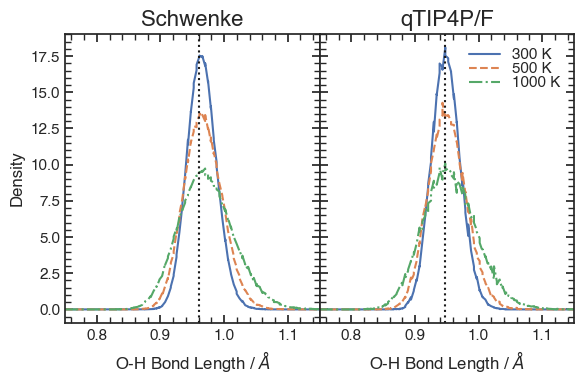

In [6]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(6,4))

# Plot for Schwenke CMD angle distribution
axs[0].plot(CMD_dist_300_Schwenke['rOH'], CMD_dist_300_Schwenke['Count'], label='300 K')
axs[0].plot(CMD_dist_500_Schwenke['rOH'], CMD_dist_500_Schwenke['Count'], label='500 K', linestyle='--')
axs[0].plot(CMD_dist_1000_Schwenke['rOH'], CMD_dist_1000_Schwenke['Count'], label='1000 K', linestyle='-.')
axs[0].set_ylabel('Density')
axs[0].set_xlim(0.75,1.15)
axs[0].set_xlabel(r'O-H Bond Length / $\AA$')
axs[0].set_title('Schwenke', fontsize=16)

# Draw vertical line on the peak of the 300 line
peak_index_schwenke = CMD_dist_300_Schwenke['Count'].idxmax()
peak_x_schwenke = CMD_dist_300_Schwenke['rOH'][peak_index_schwenke]
axs[0].axvline(x=peak_x_schwenke, color='k', linestyle=':')

# Plot for qTIP4P CMD angle distribution
axs[1].plot(CMD_dist_300['rOH'], CMD_dist_300['Count'], label='300 K')
axs[1].plot(CMD_dist_500['rOH'], CMD_dist_500['Count'], label='500 K', linestyle='--')
axs[1].plot(CMD_dist_1000['rOH'], CMD_dist_1000['Count'], label='1000 K', linestyle='-.')
axs[1].set_xlim(0.75,1.15)
axs[1].set_title('qTIP4P/F', fontsize=16)
axs[1].set_xlabel(r'O-H Bond Length / $\AA$')
axs[1].legend(frameon=False, labelspacing=0)

# Draw vertical line on the peak of the 300 line
peak_index_qtip4p = CMD_dist_300['Count'].idxmax()
peak_x_qtip4p = CMD_dist_300['rOH'][peak_index_qtip4p]
axs[1].axvline(x=peak_x_qtip4p, color='k', linestyle=':')

plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)

### CMD + GLE Testng

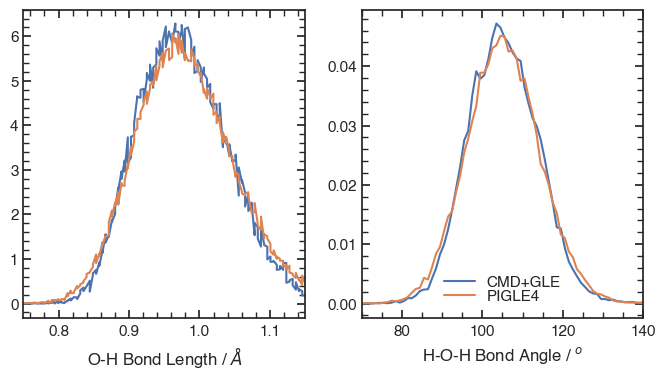

In [10]:
fig, axs = plt.subplots(1,2, figsize=(8,4))

axs[0].plot(CMD_GLE_dist_300_Schwenke['rOH'], CMD_GLE_dist_300_Schwenke['Count'], label='CMD+GLE')
axs[0].plot(PIGLE4_dist_300_Schwenke['rOH'], PIGLE4_dist_300_Schwenke['Count'], label='PIGLE4')
axs[0].set_xlabel(r'O-H Bond Length / $\AA$')
axs[0].set_xlim(0.75,1.15)

axs[1].plot(CMD_GLE_ang_300_Schwenke['HOH'], CMD_GLE_ang_300_Schwenke['Count'], label='CMD+GLE')
axs[1].plot(PIGLE4_ang_300_Schwenke['HOH'], PIGLE4_ang_300_Schwenke['Count'], label='PIGLE4')
axs[1].set_xlabel(r'H-O-H Bond Angle / $^o$')
axs[1].set_xlim(70,140)
axs[1].legend()

### PI+GLE(4) Schwenke vs CMD+QT qTIP4P

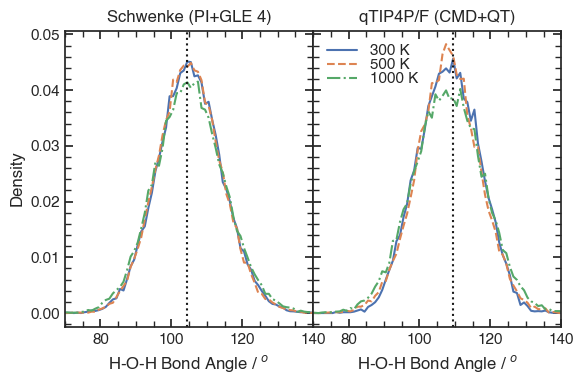

In [ ]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(6,4))

# Plot for Schwenke CMD angle distribution
axs[0].plot(PIGLE4_ang_300_Schwenke['HOH'], PIGLE4_ang_300_Schwenke['Count'], label='300 K')
axs[0].plot(PIGLE4_ang_500_Schwenke['HOH'], PIGLE4_ang_500_Schwenke['Count'], label='500 K', linestyle='--')
axs[0].plot(PIGLE4_ang_1000_Schwenke['HOH'], PIGLE4_ang_1000_Schwenke['Count'], label='1000 K', linestyle='-.')
axs[0].set_ylabel('Density')
axs[0].set_xlim(70,140)
axs[0].set_xlabel(r'H-O-H Bond Angle / $^o$')
axs[0].set_title('Schwenke (PI+GLE 4)')

#Draw vertical line on the peak of the 300 line
peak_index_schwenke = PIGLE4_ang_300_Schwenke['Count'].idxmax()
peak_x_schwenke = PIGLE4_ang_300_Schwenke['HOH'][peak_index_schwenke]
axs[0].axvline(x=peak_x_schwenke, color='k', linestyle=':')

# Plot for qTIP4P CMD angle distribution
axs[1].plot(CMD_QT_ang_300['HOH'], CMD_QT_ang_300['Count'], label='300 K')
axs[1].plot(CMD_QT_ang_500['HOH'], CMD_QT_ang_500['Count'], label='500 K', linestyle='--')
axs[1].plot(CMD_QT_ang_1000['HOH'], CMD_QT_ang_1000['Count'], label='1000 K', linestyle='-.')
axs[1].set_xlim(70,140)
axs[1].set_title('qTIP4P/F (CMD+QT)')
axs[1].set_xlabel(r'H-O-H Bond Angle / $^o$')
axs[1].legend(frameon=False, labelspacing=0)

#Draw vertical line on the peak of the 300 line
peak_index_qtip4p = CMD_QT_ang_300['Count'].idxmax()
peak_x_qtip4p = CMD_QT_ang_300['HOH'][peak_index_qtip4p]
axs[1].axvline(x=peak_x_qtip4p, color='k', linestyle=':')


plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)

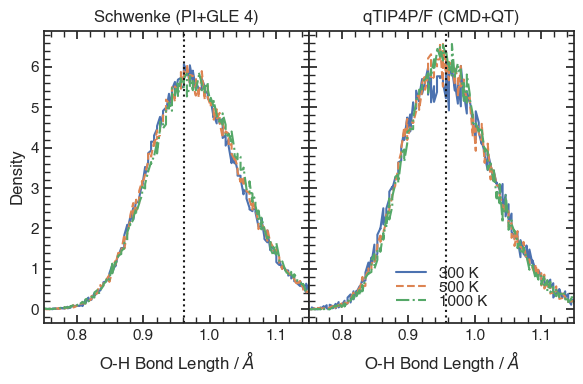

In [ ]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(6,4))

# Plot for Schwenke CMD distance distribution
axs[0].plot(PIGLE4_dist_300_Schwenke['rOH'], PIGLE4_dist_300_Schwenke['Count'], label='300 K')
axs[0].plot(PIGLE4_dist_500_Schwenke['rOH'], PIGLE4_dist_500_Schwenke['Count'], label='500 K', linestyle='--')
axs[0].plot(PIGLE4_dist_1000_Schwenke['rOH'], PIGLE4_dist_1000_Schwenke['Count'], label='1000 K', linestyle='-.')
axs[0].set_ylabel('Density')
axs[0].set_xlim(0.75,1.15)
axs[0].set_xlabel(r'O-H Bond Length / $\AA$')
axs[0].set_title('Schwenke (PI+GLE 4)')

#Draw vertical line on the peak of the 300 line
peak_index_schwenke = PIGLE4_dist_300_Schwenke['Count'].idxmax()
peak_x_schwenke = PIGLE4_dist_300_Schwenke['rOH'][peak_index_schwenke]
axs[0].axvline(x=peak_x_schwenke, color='k', linestyle=':')

# Plot for qTIP4P CMD distance distribution
axs[1].plot(CMD_QT_dist_300['rOH'], CMD_QT_dist_300['Count'], label='300 K')
axs[1].plot(CMD_QT_dist_500['rOH'], CMD_QT_dist_500['Count'], label='500 K', linestyle='--')
axs[1].plot(CMD_QT_dist_1000['rOH'], CMD_QT_dist_1000['Count'], label='1000 K', linestyle='-.')
axs[1].set_xlim(0.75,1.15)
axs[1].set_title('qTIP4P/F (CMD+QT)')
axs[1].set_xlabel(r'O-H Bond Length / $\AA$')
axs[1].legend(frameon=False, labelspacing=0)

#Draw vertical line on the peak of the 300 line
peak_index_qtip4p = CMD_QT_dist_300['Count'].idxmax()
peak_x_qtip4p = CMD_QT_dist_300['rOH'][peak_index_qtip4p]
axs[1].axvline(x=peak_x_qtip4p, color='k', linestyle=':')


plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)